This notebook uses the cleaned data to come up with a model to describe rental prices in NYC

In [256]:
# Necessary imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from pandas.plotting import table
%matplotlib inline

In [175]:
df = pd.read_csv('CLEAN_NO_1.1.csv')

In [176]:
df = df.drop(columns = ['Neighborhood'])
df = df.drop(columns = ['County'])

In [177]:
df = df.drop(columns = ['NYC'])

In [178]:
df = df[df.Bedrooms != 7 ]

In [179]:
df.Bedrooms.value_counts()

1    399
2    312
3    160
0    131
4     31
Name: Bedrooms, dtype: int64

In [180]:
X = df.loc[:, 'Bedrooms':'Wingate']
Y = df.loc[:, 'Rent']

In [181]:
m = LinearRegression()
m.fit(X,Y)
m.score(X,Y)

0.6912020110461314

In [182]:
model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     27.76
Date:                Thu, 24 Jan 2019   Prob (F-statistic):          3.12e-193
Time:                        23:30:51   Log-Likelihood:                -8808.4
No. Observations:                1033   AIC:                         1.777e+04
Df Residuals:                     955   BIC:                         1.816e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -2033.0551    382.186     -5.320      0.000   -2783.077   -1283.033
Bedrooms                              384.5129     66.117      5.816      0.000     254.761     514.264
Bathrooms                            2574.6045    114.888     22.410      0.000    2349.143    2800.066
Cooling                                12.2711    264.487      0.046      0.963    -506.771     531.313
Heating                               239.7371    272.586      0.879      0.379    -295.200     774.674
Laundry                               274.3321    104.409      2.627      0.009      69.436     479.229
Pets                                  301.7228    178.727      1.688      0.092     -49.019     652.465
Parking                               704.8228    112.266      6.278      0.000     484.507     925.139
Studio                               -168.2057    158.132     -1.064      0.288    -478.533     142.121
Battery_Park                         3789.6836    597.260      6.345      0.000    2617.590    4961.777
Bay_Ridge                             315.0745    640.448      0.492      0.623    -941.774    1571.923
Bedford_Stuyvesant                    -97.0526    407.477     -0.238      0.812    -896.706     702.601
Bensonhurst                          -125.5773    452.921     -0.277      0.782   -1014.413     763.258
Boerum_Hill                           875.3576    819.559      1.068      0.286    -732.986    2483.701
Borough_Park                          573.9377   1322.367      0.434      0.664   -2021.142    3169.018
Brighton_Beach                        299.0691    684.613      0.437      0.662   -1044.450    1642.588
Brooklyn_Heights                      946.5946    635.737      1.489      0.137    -301.009    2194.198
Brownsville                           521.0043    815.692      0.639      0.523   -1079.752    2121.760
Bushwick                             -171.8867    401.754     -0.428      0.669    -960.310     616.536
Canarsie                            -1589.0568    816.672     -1.946      0.052   -3191.736      13.622
Carroll_Gardens                      1403.1891   1325.723      1.058      0.290   -1198.477    4004.855
Chelsea                              2323.7832    444.435      5.229      0.000    1451.601    3195.966
Chinatown                            1293.2807    825.743      1.566      0.118    -327.199    2913.761
Clinton_Hill                          314.0863    612.648      0.513      0.608    -888.206    1516.378
Columbia_Street_Waterfront_District   913.0365    827.304      1.104      0.270    -710.507    2536.580
Coney_Island                          308.9502    978.509      0.316      0.752   -1611.326    2229.226
Crown_Heights                         467.7112    445.580      1.05

In [183]:
pvalues = results.pvalues

In [184]:
pvalues 

const                                  1.296251e-07
Bedrooms                               8.233392e-09
Bathrooms                              1.032081e-89
Cooling                                9.630044e-01
Heating                                3.793563e-01
Laundry                                8.739685e-03
Pets                                   9.170298e-02
Parking                                5.192160e-10
Studio                                 2.877326e-01
Battery_Park                           3.427594e-10
Bay_Ridge                              6.228612e-01
Bedford_Stuyvesant                     8.117930e-01
Bensonhurst                            7.816396e-01
Boerum_Hill                            2.857524e-01
Borough_Park                           6.643697e-01
Brighton_Beach                         6.623231e-01
Brooklyn_Heights                       1.368251e-01
Brownsville                            5.231539e-01
Bushwick                               6.688636e-01
Canarsie    

In [185]:
pvalues_important = pvalues[pvalues < 0.05]

In [186]:
pvalues_important

const                1.296251e-07
Bedrooms             8.233392e-09
Bathrooms            1.032081e-89
Laundry              8.739685e-03
Parking              5.192160e-10
Battery_Park         3.427594e-10
Chelsea              2.098274e-07
East_Village         1.000028e-03
Flatiron_District    3.713837e-05
Garment_District     1.070771e-04
Gramercy             5.873296e-04
Greenpoint           4.960304e-02
Greenwich_Village    1.605893e-09
Hell's_Kitchen       1.394947e-04
Hudson_Yards         2.250878e-02
Little_Italy         1.195044e-02
Lower_East_Side      3.983054e-07
Midtown              3.090082e-04
Murray_Hill          5.364499e-04
New_Utrecht          9.141144e-03
SoHo                 3.468238e-14
Sutton_Place         3.051290e-07
Tribeca              3.020303e-08
Turtle_Bay           9.861860e-05
Upper_East_Side      5.672553e-06
Upper_West_Side      2.170081e-05
West_Village         3.619585e-10
dtype: float64

In [187]:
p_round = round(pvalues_important,2)

In [188]:
p_round

const                0.00
Bedrooms             0.00
Bathrooms            0.00
Laundry              0.01
Parking              0.00
Battery_Park         0.00
Chelsea              0.00
East_Village         0.00
Flatiron_District    0.00
Garment_District     0.00
Gramercy             0.00
Greenpoint           0.05
Greenwich_Village    0.00
Hell's_Kitchen       0.00
Hudson_Yards         0.02
Little_Italy         0.01
Lower_East_Side      0.00
Midtown              0.00
Murray_Hill          0.00
New_Utrecht          0.01
SoHo                 0.00
Sutton_Place         0.00
Tribeca              0.00
Turtle_Bay           0.00
Upper_East_Side      0.00
Upper_West_Side      0.00
West_Village         0.00
dtype: float64

In [189]:
PVdf = pd.DataFrame(p_round, columns=['P>|t|'])

In [190]:
PVdf

,P>|t|
const,0.00
Bedrooms,0.00
Bathrooms,0.00
Laundry,0.01
Parking,0.00
Battery_Park,0.00
Chelsea,0.00
East_Village,0.00
Flatiron_District,0.00
Garment_District,0.00


In [191]:
len(PVdf)

27

In [192]:
PVdf1 = PVdf.iloc[1:14]
PVdf1

,P>|t|
Bedrooms,0.00
Bathrooms,0.00
Laundry,0.01
Parking,0.00
Battery_Park,0.00
Chelsea,0.00
East_Village,0.00
Flatiron_District,0.00
Garment_District,0.00
Gramercy,0.00


In [193]:
PVdf2 = PVdf.iloc[14:]
PVdf2

,P>|t|
Hudson_Yards,0.02
Little_Italy,0.01
Lower_East_Side,0.00
Midtown,0.00
Murray_Hill,0.00
New_Utrecht,0.01
SoHo,0.00
Sutton_Place,0.00
Tribeca,0.00
Turtle_Bay,0.00


In [194]:
type(results.summary())

statsmodels.iolib.summary.Summary

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
m = LinearRegression()
m.fit(X_train,y_train)
print(m.score(X_train,y_train))
print(m.score(X_test,y_test))

0.7135540361042711
-1.9085584723432537e+21


In [196]:
RCV = RidgeCV()
RCV.fit(X,Y)
print(RCV.score(X,Y))
print(LCV.score(X,Y))


0.6909223671638687
0.6879054080843352


In [197]:
RCV_coef = RCV.coef_

In [198]:
RCV_coef = list(RCV.coef_)

In [199]:
len(RCV_coef)

77

In [200]:
for i in range(len(RCV_coef)):
    RCV_coef[i] = round(RCV_coef[i] , 2)

In [201]:
dataRCV = {'Coefficient':coef_list , 'Values':RCV_coef }

In [202]:
results_tableRCV = pd.DataFrame(data=dataRCV)

In [203]:
results_tableRCV.head()

,Coefficient,Values
0,Bedrooms,375.55
1,Bathrooms,2581.13
2,Cooling,18.85
3,Heating,227.05
4,Laundry,283.28


In [204]:
RCV_intercept = round(RCV.intercept_, 2)

In [205]:
results_tableRCV = results_tableRCV.append({'Coefficient': 'Intercept', 'Values': RCV_intercept}, ignore_index=True)

In [206]:
results_tableRCV

,Coefficient,Values
0,Bedrooms,375.55
1,Bathrooms,2581.13
2,Cooling,18.85
3,Heating,227.05
4,Laundry,283.28
5,Pets,349.42
6,Parking,706.29
7,Studio,-174.66
8,Battery_Park,3424.67
9,Bay_Ridge,3.17


In [267]:
topRCV = results_tableRCV.sort_values(['Values'], ascending = False)
topRCV = topRCV.reset_index()
topRCV = topRCV.drop(columns = ['index'])
topRCV

,Coefficient,Values
0,SoHo,4377.94
1,Battery_Park,3424.67
2,West_Village,2868.76
3,Tribeca,2629.18
4,Lower_East_Side,2623.96
5,Bathrooms,2581.13
6,Greenwich_Village,2349.78
7,Flatiron_District,2022.39
8,Chelsea,1999.04
9,Sutton_Place,1976.44


In [313]:
bottomRCV = results_tableRCV.sort_values(['Values'], ascending = True)
bottomRCV = bottomRCV.reset_index()

bottomRCV = bottomRCV.drop(columns = ['index'])
bottomRCV

,Coefficient,Values
0,New_Utrecht,-2673.68
1,Homecrest,-2639.66
2,Canarsie,-1803.96
3,Intercept,-1763.88
4,Manhattan_Beach,-1309.05
5,Wingate,-1168.92
6,Ocean_Hill,-1040.04
7,Marine_Park,-880.79
8,Sheepshead_Bay,-706.82
9,Greenwood,-579.64


In [209]:
bottomRCV['Values'] = bottomRCV['Values'].abs()

In [314]:
bottomRCV['Values'] = bottomRCV['Values']

In [210]:
top10RCV = topRCV.iloc[0:10]
top10RCV

,Coefficient,Values
0,SoHo,4377.94
1,Battery_Park,3424.67
2,West_Village,2868.76
3,Tribeca,2629.18
4,Lower_East_Side,2623.96
5,Bathrooms,2581.13
6,Greenwich_Village,2349.78
7,Flatiron_District,2022.39
8,Chelsea,1999.04
9,Sutton_Place,1976.44


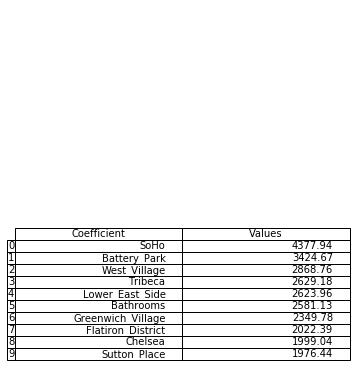

In [266]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, top10RCV) 

In [315]:
bottom10RCV = bottomRCV.iloc[0:10]
bottom10RCV

,Coefficient,Values
0,New_Utrecht,-2673.68
1,Homecrest,-2639.66
2,Canarsie,-1803.96
3,Intercept,-1763.88
4,Manhattan_Beach,-1309.05
5,Wingate,-1168.92
6,Ocean_Hill,-1040.04
7,Marine_Park,-880.79
8,Sheepshead_Bay,-706.82
9,Greenwood,-579.64


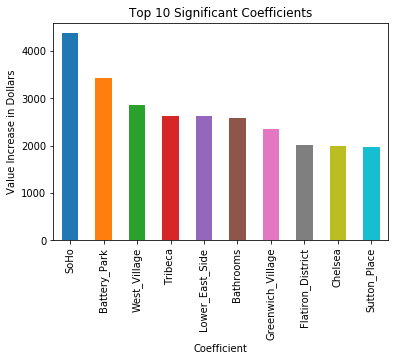

<Figure size 216x288 with 0 Axes>

In [275]:
top10RCV.plot(kind = 'bar', x='Coefficient', y='Values')
plt.legend().set_visible(False)
plt.ylabel('Value Increase in Dollars');
plt.title('Top 10 Significant Coefficients')
plt.figure(figsize=(3,4))
plt.savefig('Top10RCVCoef.png')

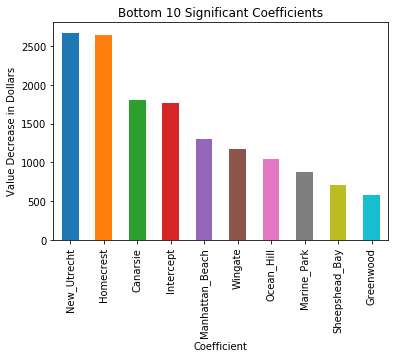

<Figure size 2160x2880 with 0 Axes>

In [276]:
bottom10RCV.plot(kind = 'bar', x='Coefficient', y='Values')
plt.legend().set_visible(False)
plt.ylabel('Value Decrease in Dollars');
plt.title('Bottom 10 Significant Coefficients')
plt.figure(figsize=(30,40))
plt.savefig('Bottom10RCVCoef.png')


In [215]:
LCV = LassoCV()
LCV.fit(X,Y)
LCV.score(X,Y)

0.6879054080843352

In [216]:
bedrooms = list(df['Bedrooms'])
rent = list(df['Rent'])
bathrooms = list(df['Bathrooms'])


In [282]:
bd = df.Bedrooms.value_counts()
bd

1    399
2    312
3    160
0    131
4     31
Name: Bedrooms, dtype: int64

In [287]:
ba = df.Bathrooms.value_counts()
ba

1.0    828
2.0    142
1.5     38
3.0     13
2.5      9
3.5      1
4.5      1
4.0      1
Name: Bathrooms, dtype: int64

In [295]:
bd = {'Bedrooms': [0,1,2,3,4], 'Count': [131,399,312,160,31]}


In [296]:
ba = {'Bathrooms': [1.0,1.5,2.0,2.5,3.0,3.5,4,4.5], 'Count': [828,38,142,9,13,1,1,1]}

In [297]:
bdf = pd.DataFrame.from_dict(bd)

In [298]:
baf = pd.DataFrame.from_dict(ba)

In [305]:
plt.scatter(bedrooms)


TypeError: scatter() missing 1 required positional argument: 'y'

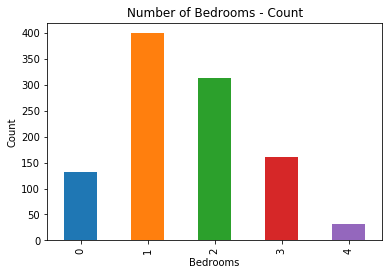

In [302]:
bdf.plot(kind = 'bar', x='Bedrooms', y='Count')
plt.legend().set_visible(False)
plt.ylabel('Count')
plt.xlabel('Bedrooms')
plt.title('Number of Bedrooms - Count')
plt.savefig('Top10Coef.png')

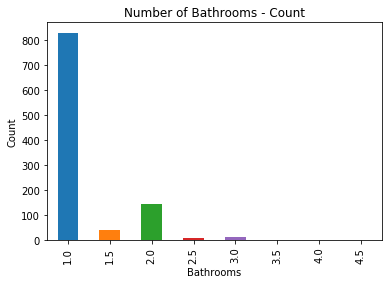

In [304]:
baf.plot(kind = 'bar', x='Bathrooms', y='Count')
plt.legend().set_visible(False)
plt.ylabel('Count')
plt.xlabel('Bathrooms')
plt.title('Number of Bathrooms - Count')
plt.savefig('Top10Coef.png')

Text(0.5,1,'Bathrooms vs Price')

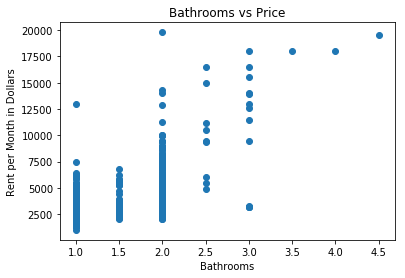

In [312]:
plt.scatter(bathrooms,rent)
plt.ylabel('Rent per Month in Dollars')
plt.xlabel('Bathrooms')
plt.title('Bathrooms vs Price')

Text(0.5,1,'Bedrooms vs Price')

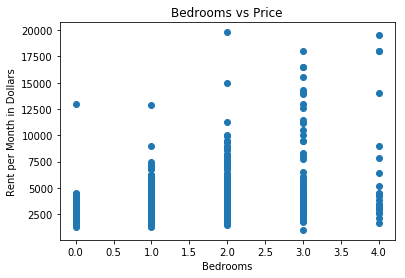

In [311]:
plt.scatter(bedrooms,rent)
plt.ylabel('Rent per Month in Dollars')
plt.xlabel('Bedrooms')
plt.title('Bedrooms vs Price')

In [221]:
LCV.intercept_

-1574.0599791923023

In [222]:
LCV_coef = list(LCV.coef_)

In [223]:
for i in range(len(LCV_coef)):
    LCV_coef[i] = round(LCV_coef[i] , 2)

In [224]:
LCV_coef

[347.0,
 2595.4,
 32.42,
 181.18,
 289.15,
 389.56,
 707.33,
 -184.83,
 3118.69,
 -10.35,
 -560.28,
 -486.03,
 13.74,
 0.0,
 -0.0,
 251.68,
 0.0,
 -641.34,
 -1655.68,
 0.0,
 1764.32,
 414.33,
 -36.52,
 36.65,
 -0.0,
 -0.0,
 -56.86,
 0.0,
 -0.0,
 -72.32,
 -0.0,
 910.53,
 -465.82,
 1712.18,
 0.0,
 -0.0,
 -0.0,
 1475.99,
 0.0,
 0.0,
 966.89,
 -0.0,
 449.62,
 2117.74,
 -415.19,
 266.93,
 1071.02,
 -1943.48,
 838.26,
 -352.67,
 1077.0,
 2326.67,
 -955.7,
 -0.0,
 1007.58,
 -391.53,
 1220.02,
 -2360.89,
 -1032.48,
 0.0,
 -0.0,
 -5.94,
 0.0,
 -7.67,
 -753.67,
 4092.53,
 -34.0,
 1735.15,
 2346.11,
 484.06,
 1637.3,
 1281.97,
 1238.72,
 2606.33,
 174.52,
 0.0,
 -1159.37]

In [225]:
LCV_intercept = LCV.intercept_

In [226]:
LCV_intercept = round(LCV_intercept, 2)

In [227]:
LCV_intercept

-1574.06

In [228]:
column_list = df.columns.tolist()

In [229]:
coef_list = column_list[4:]

In [230]:
coef_list

['Bedrooms',
 'Bathrooms',
 'Cooling',
 'Heating',
 'Laundry',
 'Pets',
 'Parking',
 'Studio',
 'Battery_Park',
 'Bay_Ridge',
 'Bedford_Stuyvesant',
 'Bensonhurst',
 'Boerum_Hill',
 'Borough_Park',
 'Brighton_Beach',
 'Brooklyn_Heights',
 'Brownsville',
 'Bushwick',
 'Canarsie',
 'Carroll_Gardens',
 'Chelsea',
 'Chinatown',
 'Clinton_Hill',
 'Columbia_Street_Waterfront_District',
 'Coney_Island',
 'Crown_Heights',
 'Downtown',
 'Dyker_Heights',
 'East_Flatbush',
 'East_Harlem',
 'East_New_York',
 'East_Village',
 'Flatbush',
 'Flatiron_District',
 'Flatlands',
 'Fort_Greene',
 'Fort_Hamilton',
 'Garment_District',
 'Georgetown',
 'Gowanus',
 'Gramercy',
 'Gravesend',
 'Greenpoint',
 'Greenwich_Village',
 'Greenwood',
 'Harlem',
 "Hell's_Kitchen",
 'Homecrest',
 'Hudson_Yards',
 'Kensington',
 'Little_Italy',
 'Lower_East_Side',
 'Manhattan_Beach',
 'Marine_Park',
 'Midtown',
 'Midwood',
 'Murray_Hill',
 'New_Utrecht',
 'Ocean_Hill',
 'Ocean_Parkway',
 'Park_Slope',
 'Prospect_Lefferts_

In [231]:
data = {'Coefficient':coef_list , 'Values':LCV_coef }

In [232]:
results_table = pd.DataFrame(data=data)

In [233]:
results_table

,Coefficient,Values
0,Bedrooms,347.00
1,Bathrooms,2595.40
2,Cooling,32.42
3,Heating,181.18
4,Laundry,289.15
5,Pets,389.56
6,Parking,707.33
7,Studio,-184.83
8,Battery_Park,3118.69
9,Bay_Ridge,-10.35


In [234]:
results_table = results_table.append({'Coefficient': 'Intercept', 'Values': LCV_intercept}, ignore_index=True)

In [235]:
results_table

,Coefficient,Values
0,Bedrooms,347.00
1,Bathrooms,2595.40
2,Cooling,32.42
3,Heating,181.18
4,Laundry,289.15
5,Pets,389.56
6,Parking,707.33
7,Studio,-184.83
8,Battery_Park,3118.69
9,Bay_Ridge,-10.35


In [236]:
top = results_table.sort_values(['Values'], ascending = False)
#top = top.drop(columns = ['index'])
top

,Coefficient,Values
65,SoHo,4092.53
8,Battery_Park,3118.69
73,West_Village,2606.33
1,Bathrooms,2595.40
68,Tribeca,2346.11
51,Lower_East_Side,2326.67
43,Greenwich_Village,2117.74
20,Chelsea,1764.32
67,Sutton_Place,1735.15
33,Flatiron_District,1712.18


In [237]:
bottom = results_table.sort_values(['Values'], ascending = True)

bottom.head()

,Coefficient,Values
57,New_Utrecht,-2360.89
47,Homecrest,-1943.48
18,Canarsie,-1655.68
77,Intercept,-1574.06
76,Wingate,-1159.37


In [238]:
bottom['Values'] = bottom['Values'].abs()

In [239]:
bottom

,Coefficient,Values
57,New_Utrecht,2360.89
47,Homecrest,1943.48
18,Canarsie,1655.68
77,Intercept,1574.06
76,Wingate,1159.37
58,Ocean_Hill,1032.48
52,Manhattan_Beach,955.70
64,Sheepshead_Bay,753.67
17,Bushwick,641.34
10,Bedford_Stuyvesant,560.28


In [240]:
top.columns

Index(['Coefficient', 'Values'], dtype='object')

In [241]:
top10 = top.iloc[0:10]

In [242]:
top10

,Coefficient,Values
65,SoHo,4092.53
8,Battery_Park,3118.69
73,West_Village,2606.33
1,Bathrooms,2595.40
68,Tribeca,2346.11
51,Lower_East_Side,2326.67
43,Greenwich_Village,2117.74
20,Chelsea,1764.32
67,Sutton_Place,1735.15
33,Flatiron_District,1712.18


In [243]:
bottom10 = bottom.iloc[0:10]
bottom10

,Coefficient,Values
57,New_Utrecht,2360.89
47,Homecrest,1943.48
18,Canarsie,1655.68
77,Intercept,1574.06
76,Wingate,1159.37
58,Ocean_Hill,1032.48
52,Manhattan_Beach,955.70
64,Sheepshead_Bay,753.67
17,Bushwick,641.34
10,Bedford_Stuyvesant,560.28


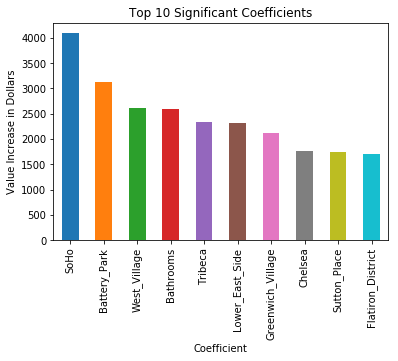

In [244]:
top10.plot(kind = 'bar', x='Coefficient', y='Values')
plt.legend().set_visible(False)
plt.ylabel('Value Increase in Dollars');
plt.title('Top 10 Significant Coefficients')
plt.savefig('Top10Coef.png')

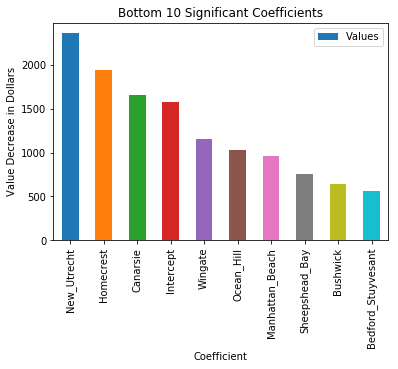

In [245]:
bottom10.plot(kind = 'bar', x='Coefficient', y='Values')
plt.ylabel('Value Decrease in Dollars');
plt.title('Bottom 10 Significant Coefficients')
plt.savefig('Bottom10Coef.png')

In [246]:
df

,Unnamed: 0,Unnamed: 0.1,Address,Rent,Bedrooms,Bathrooms,Cooling,Heating,Laundry,Pets,...,Sutton_Place,Tribeca,Tudor_City,Turtle_Bay,Upper_East_Side,Upper_West_Side,West_Village,Williamsburg,Windsor_Terrace,Wingate
0,0,0,E 16th St,2500,3,2.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2,120 Wyckoff Ave # 2F,1750,1,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,3,333 E 102nd St APT 205,3495,2,2.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,4,247 Mulberry St APT 3L,4250,1,1.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,5,315 E 56th St APT 3D,3311,1,1.0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
5,5,6,219 E 76th St APT 2A,2200,0,1.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,6,7,317 W 21st St APT 3D,2925,1,1.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7,7,8,323 E 93rd St APT 1E,2850,2,1.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8,8,9,78 Cornelia St APT 1,2900,2,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,9,10,66 Bainbridge St APT 4,2600,2,1.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [247]:
df.groupby("Bedrooms").mean()

,Unnamed: 0,Unnamed: 0.1,Rent,Bathrooms,Cooling,Heating,Laundry,Pets,Parking,Studio,...,Sutton_Place,Tribeca,Tudor_City,Turtle_Bay,Upper_East_Side,Upper_West_Side,West_Village,Williamsburg,Windsor_Terrace,Wingate
Bedrooms,,,,,,,,,,,,,,,,,,,,,
0,557.221374,588.206107,2571.045802,1.000000,0.183206,0.160305,0.679389,0.938931,0.267176,1.0,...,0.053435,0.022901,0.022901,0.022901,0.175573,0.076336,0.030534,0.038168,0.000000,0.000000
1,531.766917,561.162907,3145.598997,1.030075,0.275689,0.243108,0.684211,0.909774,0.320802,0.0,...,0.032581,0.012531,0.005013,0.007519,0.112782,0.072682,0.017544,0.065163,0.002506,0.002506
2,503.378205,531.567308,3569.423077,1.299679,0.291667,0.272436,0.612179,0.910256,0.253205,0.0,...,0.025641,0.006410,0.003205,0.003205,0.060897,0.032051,0.003205,0.067308,0.000000,0.012821
3,512.318750,540.350000,3979.050000,1.496875,0.356250,0.350000,0.512500,0.837500,0.100000,0.0,...,0.025000,0.012500,0.000000,0.000000,0.050000,0.012500,0.006250,0.112500,0.000000,0.000000
4,494.612903,524.064516,5597.032258,1.790323,0.258065,0.290323,0.580645,0.935484,0.096774,0.0,...,0.000000,0.000000,0.000000,0.032258,0.032258,0.000000,0.032258,0.032258,0.000000,0.000000


In [248]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Address', 'Rent', 'Bedrooms',
       'Bathrooms', 'Cooling', 'Heating', 'Laundry', 'Pets', 'Parking',
       'Studio', 'Battery_Park', 'Bay_Ridge', 'Bedford_Stuyvesant',
       'Bensonhurst', 'Boerum_Hill', 'Borough_Park', 'Brighton_Beach',
       'Brooklyn_Heights', 'Brownsville', 'Bushwick', 'Canarsie',
       'Carroll_Gardens', 'Chelsea', 'Chinatown', 'Clinton_Hill',
       'Columbia_Street_Waterfront_District', 'Coney_Island', 'Crown_Heights',
       'Downtown', 'Dyker_Heights', 'East_Flatbush', 'East_Harlem',
       'East_New_York', 'East_Village', 'Flatbush', 'Flatiron_District',
       'Flatlands', 'Fort_Greene', 'Fort_Hamilton', 'Garment_District',
       'Georgetown', 'Gowanus', 'Gramercy', 'Gravesend', 'Greenpoint',
       'Greenwich_Village', 'Greenwood', 'Harlem', 'Hell's_Kitchen',
       'Homecrest', 'Hudson_Yards', 'Kensington', 'Little_Italy',
       'Lower_East_Side', 'Manhattan_Beach', 'Marine_Park', 'Midtown',
       'Midwood', 'M

In [249]:
dropC = df.loc[:,"Cooling":]

In [250]:
dropC2 = df.loc[:,'Unnamed: 0':'Rent']

In [251]:
BedVSBath = df.copy()



In [252]:
BedVSBath = df.drop(columns = dropC)

In [253]:
BedVSBath = BedVSBath.drop(columns = dropC2)

In [254]:
BedVSBath.head()

,Bedrooms,Bathrooms
0,3,2.0
1,1,1.0
2,2,2.0
3,1,1.0
4,1,1.0


In [255]:
BedVSBath.groupby('Bedrooms').mean()

,Bathrooms
Bedrooms,
0,1.000000
1,1.030075
2,1.299679
3,1.496875
4,1.790323
